In [ ]:
#Createed on September 11, 2024, Data Preprocessing for Viral Bound Peptide Association with BK Viral infection
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
bk_data = pd.read_csv('/content/drive/MyDrive/ViralPeptidesv.BKVirus_CleanVersion.csv')
# bk_data.head()
# print(bk_data.shape)
# bk_data.isnull().sum()
bk_data_mod = bk_data.ffill()
bk_data_mod

,Patient,Transplant organ,Disease,Sample Code,Sampling day,Source,Viral load (copies/mL),Number of polymorphisms,Median Coverage
0,1.0,Kidney,-,85,02/04/2012,Urine,1.28 × 105,206,3525.58
1,1.0,Kidney,-,110,28/02/2013,Urine,4.87 × 105,216,3373.36
2,1.0,Kidney,-,188,27/03/2013,Urine,3.14 × 105,210,4211.17
3,1.0,Kidney,-,401,26/06/2013,Urine,5.69 × 105,200,1471.41
4,2.0,Kidney,-,227,10/04/2013,Urine,1.60 × 108,227,2039.69
...,...,...,...,...,...,...,...,...,...
220,95.0,Kidney,-,240,16/04/2013,Urine,4.44 × 105,87,3047.68
221,95.0,Kidney,-,397,24/06/2013,Urine,2.37 × 106,86,3730.36
222,96.0,Hematopoietic cells,-,114,01/03/2013,Urine,3.08 × 109,87,3898.58
223,96.0,Hematopoietic cells,-,239,15/04/2013,Urine,1.13 × 1010,87,4043.74


In [ ]:
bk_data_mod.value_counts(['Transplant organ'])

,count
Transplant organ,
Kidney,179
Lung,14
Hematopoietic cells,11
Hematopoietic cell,10
Kidney-Heart,8
Hematopoietic Cells,1
Kidney-Pancreas,1
Lung-Heart,1


In [ ]:
bk_data_mod['Disease'].replace('-','BKVAN',inplace = True)
bk_data_mod.value_counts('Disease')


<ipython-input-58-314d7915a31f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bk_data_mod['Disease'].replace('-','BKVAN',inplace = True)


,count
Disease,
BKVAN,225


In [ ]:
bk_data_mod.value_counts('Source')

,count
Source,
Urine,197
Blood,28


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(bk_data_mod['Transplant organ'])
numerical_organ = le.transform(bk_data_mod['Transplant organ'])
print(len(bk_data_mod['Transplant organ']))
print(bk_data_mod['Transplant organ'][0])
dict1 = {}
for i in range (0,225):
  dict1[bk_data_mod['Transplant organ'][i]] = numerical_organ[i]
bk_data_mod['Transplant organ'] = bk_data_mod['Transplant organ'].map(dict1).fillna(bk_data_mod['Transplant organ'])


225
Kidney


In [ ]:
le.fit(bk_data_mod['Source'])
numerical_source = le.transform(bk_data_mod['Source'])
dict2 = {}
for i in range (0,225):
  dict2[bk_data_mod['Source'][i]] = numerical_source[i]
bk_data_mod['Source'] = bk_data_mod['Source'].map(dict2).fillna(bk_data_mod['Source'])

In [ ]:
le.fit(bk_data_mod['Disease'])
numerical_disease = le.transform(bk_data_mod['Disease'])
dict4 = {}
for i in range (0,225):
  dict4[bk_data_mod['Disease'][i]] = numerical_disease[i]
bk_data_mod['Disease'] = bk_data_mod['Disease'].map(dict4).fillna(bk_data_mod['Disease'])

In [ ]:
viralvals  = []
for i in range (0,225):
  temp = bk_data_mod['Viral load (copies/mL)'][i].split("×")
  temp[0].strip()
  newdigits = float(temp[0])
  temp[1].strip()
  ten = temp[1][0:3]
  expo = temp[1][3::]
  ten = int(ten)
  expo = int(expo)
  power = ten**expo
  viralload = newdigits * power
  viralvals.append(viralload)
dict3 = {}
for i in range (0,225):
  dict3[bk_data_mod['Viral load (copies/mL)'][i]] = viralvals[i]
bk_data_mod['Viral load (copies/mL)'] = bk_data_mod['Viral load (copies/mL)'].map(dict3).fillna(bk_data_mod['Viral load (copies/mL)'])





In [ ]:
del bk_data_mod['Sampling day']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(bk_data_mod)
principal_df = pd.DataFrame(data = principal_components, columns = ['Number of polymorphisms', 'Viral load (copies/mL)'])

In [ ]:
def create_pca_plot(category):
  principal_df[category] = bk_data_mod[category] # Categories to visualize

  fig = plt.figure(figsize = (12, 8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('Number of Polymorphisms', fontsize = 15)
  ax.set_ylabel('BK Viral', fontsize = 15)
  targets = pd.unique(bk_data_mod[category]).tolist() # All possible y values
  colors = ['red', 'blue', 'orange', 'purple'] # different colors for different targets
  colors = colors[:len(targets)]
  for target, color in zip(targets, colors): # label points by antibiotic resistant target
      indicesToKeep = principal_df[category] == target
      ax.scatter(principal_df.loc[indicesToKeep, 'Number of polymorphisms'],
                principal_df.loc[indicesToKeep, 'Viral load (copies/mL)'],
                c = color, s = 40, alpha=0.75)
  ax.legend(targets, loc='lower right')
  ax.get_xaxis().set_ticks([]);
  ax.get_yaxis().set_ticks([]);

In [ ]:
bk_data_mod['logvalue'] = np.log10(bk_data_mod['Viral load (copies/mL)'])


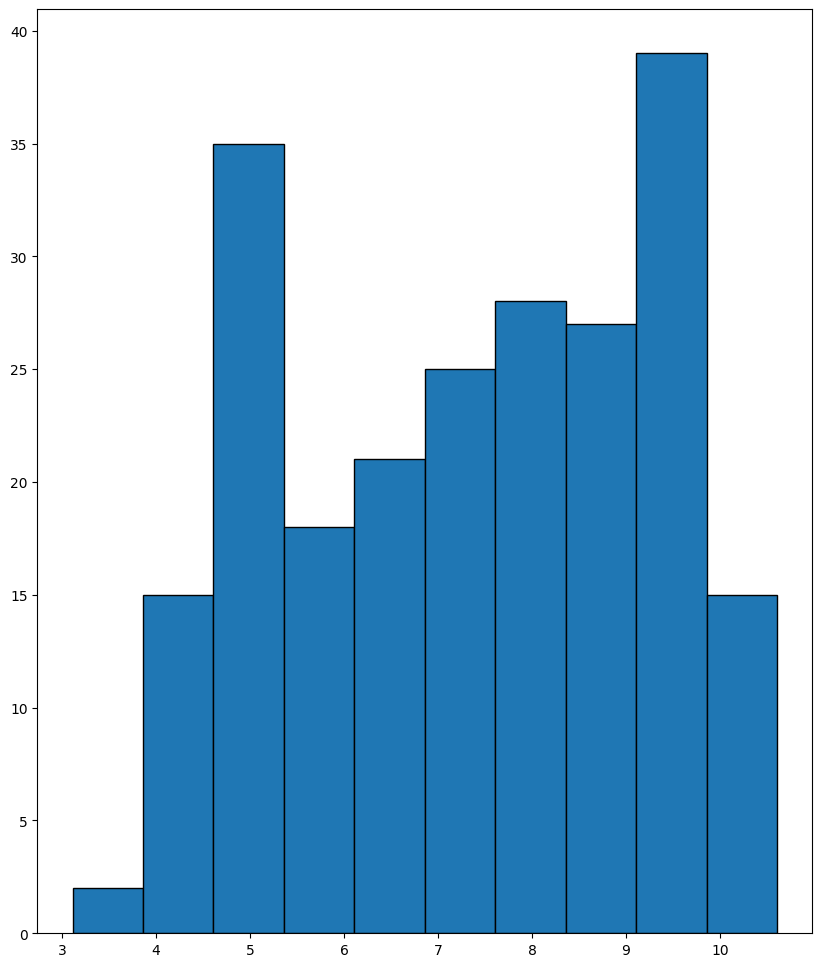

In [ ]:
plt.figure(figsize = (10,12))
plt.hist(bk_data_mod['logvalue'],edgecolor = 'black')
plt.show()

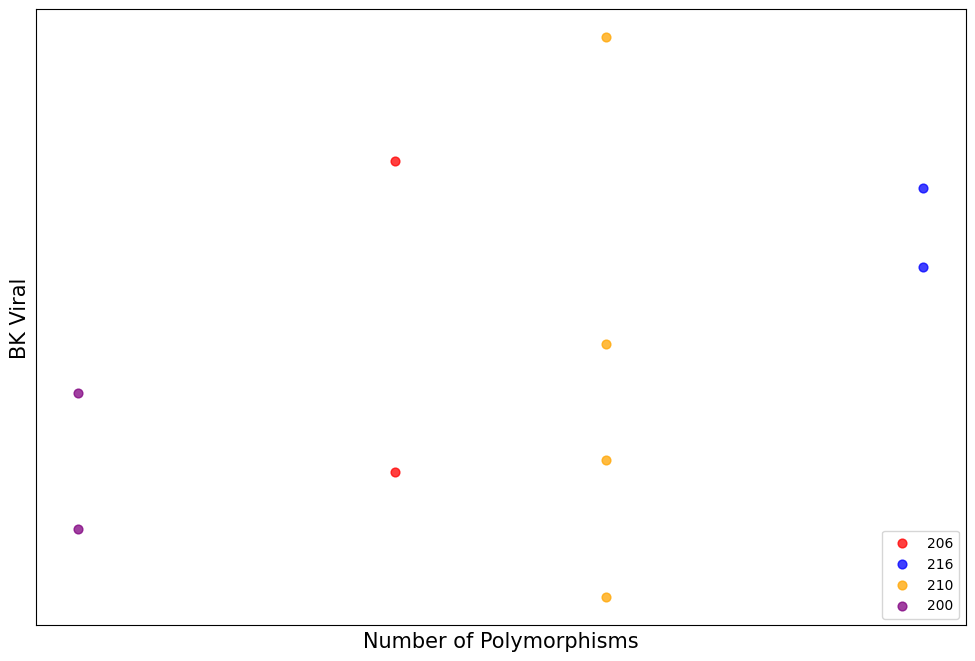

In [ ]:
create_pca_plot('Number of polymorphisms')

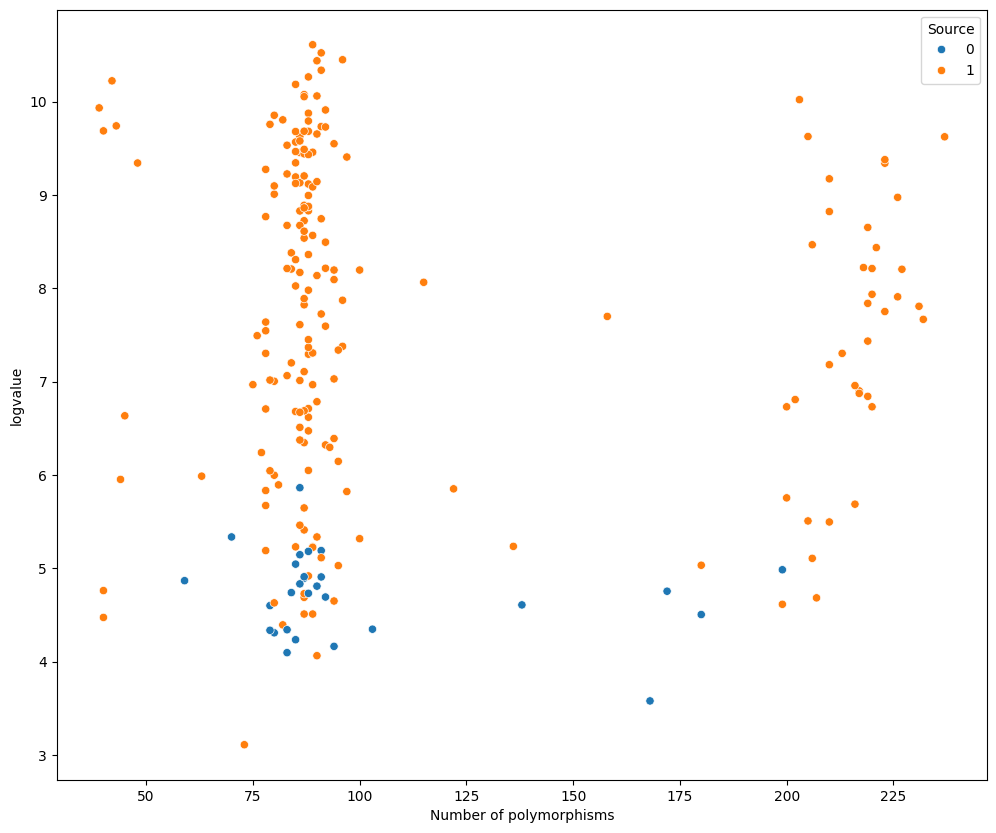

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=bk_data_mod['Number of polymorphisms'], y=bk_data_mod['logvalue'],hue= bk_data_mod['Source'])
plt.show()

In [ ]:
bk_data_mod.describe()

,Patient,Transplant organ,Disease,Sample Code,Source,Viral load (copies/mL),Number of polymorphisms,Median Coverage,logvalue
count,225.000000,225.000000,225.0,225.000000,225.000000,2.250000e+02,225.000000,225.000000,225.000000
mean,46.004444,3.097778,0.0,246.880000,0.875556,1.892404e+09,109.111111,3056.177422,7.333515
std,28.563135,0.972499,0.0,133.412554,0.330824,5.222467e+09,51.075934,1164.064437,1.884902
min,1.000000,0.000000,0.0,3.000000,0.000000,1.290000e+03,39.000000,29.470000,3.110590
25%,21.000000,3.000000,0.0,124.000000,1.000000,4.440000e+05,85.000000,2396.030000,5.647383
50%,45.000000,3.000000,0.0,244.000000,1.000000,2.820000e+07,88.000000,3280.950000,7.450249
75%,71.000000,3.000000,0.0,361.000000,1.000000,1.020000e+09,95.000000,3920.650000,9.008600
max,96.000000,7.000000,0.0,475.000000,1.000000,4.070000e+10,237.000000,5276.670000,10.609594


In [ ]:
bk_data_mod.head(225)

,Patient,Transplant organ,Disease,Sample Code,Source,Viral load (copies/mL),Number of polymorphisms,Median Coverage,logvalue
0,1.0,3,0,85,1,1.280000e+05,206,3525.58,5.107210
1,1.0,3,0,110,1,4.870000e+05,216,3373.36,5.687529
2,1.0,3,0,188,1,3.140000e+05,210,4211.17,5.496930
3,1.0,3,0,401,1,5.690000e+05,200,1471.41,5.755112
4,2.0,3,0,227,1,1.600000e+08,227,2039.69,8.204120
...,...,...,...,...,...,...,...,...,...
220,95.0,3,0,240,1,4.440000e+05,87,3047.68,5.647383
221,95.0,3,0,397,1,2.370000e+06,86,3730.36,6.374748
222,96.0,2,0,114,1,3.080000e+09,87,3898.58,9.488551
223,96.0,2,0,239,1,1.130000e+10,87,4043.74,10.053078


In [ ]:
y = bk_data_mod['logvalue']
X = bk_data_mod[['Number of polymorphisms']]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
np.random.seed(42)

In [ ]:
import math
def truncate(number, decimals):
    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

In [ ]:

reg = LinearRegression() #Linear Regression
reg.fit(X_train,y_train)
prediction = reg.predict(X_test)
print("Mean Absolute Error:     ",truncate(mean_absolute_error(y_test,prediction),6))
print("Mean Squared Error:      ",truncate(mean_squared_error(y_test,prediction),6))
print("Square Residual:         ",truncate(r2_score(y_test,prediction),6))
print("Root Mean Squared Error: ",str(truncate(mean_squared_error(y_test,prediction, squared = False),6))+'00')


Mean Absolute Error:      1.808274
Mean Squared Error:       4.188355
Square Residual:          -0.017407
Root Mean Squared Error:  2.04654700


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


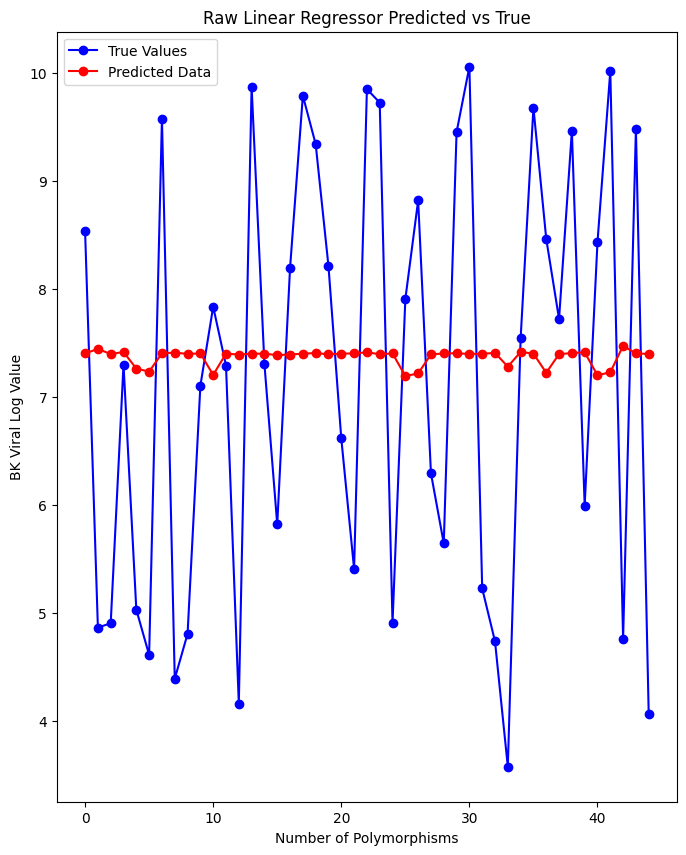

In [ ]:
plt.figure(figsize=(8, 10))

# Plot real data
plt.plot(range(len(y_test)), y_test, label='True Values', color='blue',marker = 'o')

# Plot predicted data
plt.plot(range(len(prediction)), prediction, label='Predicted Data', color='red',marker='o')

# Add labels and legend
plt.xlabel('Number of Polymorphisms')
plt.ylabel('BK Viral Log Value')
plt.title('Raw Linear Regressor Predicted vs True')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn import linear_model # Ridge Regression
reg1 = linear_model.Ridge(alpha = 0.5)
reg1.fit(X_train,y_train)
reg1_pred = reg1.predict(X_test)
print("Mean Absolute Error:    ",truncate(mean_absolute_error(y_test,reg1_pred),6))
print("Mean Squared Error:     ",str(truncate(mean_squared_error(y_test,reg1_pred),6))+'0')
print("Square Residual:        ",truncate(r2_score(y_test,reg1_pred),6))
print("Root Mean Square Error: ",truncate(mean_squared_error(y_test,reg1_pred,squared = False),6))

Mean Absolute Error:     1.808274
Mean Squared Error:      4.1883550
Square Residual:         -0.017407
Root Mean Square Error:  2.046547


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


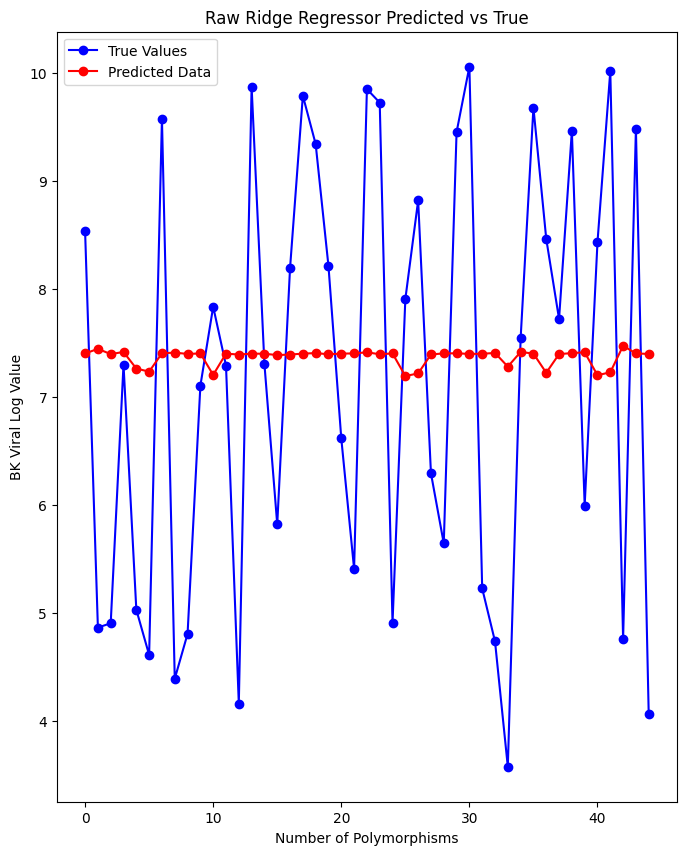

In [ ]:
plt.figure(figsize=(8, 10))

# Plot real data
plt.plot(range(len(y_test)), y_test, label='True Values', color='blue',marker = 'o')

# Plot predicted data
plt.plot(range(len(reg1_pred)), reg1_pred, label='Predicted Data', color='red',marker='o')

# Add labels and legend
plt.xlabel('Number of Polymorphisms')
plt.ylabel('BK Viral Log Value')
plt.title('Raw Ridge Regressor Predicted vs True')
plt.legend()

# Show the plot
plt.show()

In [ ]:
clf = linear_model.Lasso(alpha = 0.01) # Lasso : Note: 0.01 Alpha yields the lowest M.A. Error
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)
print("Mean Absolute Error:    ",truncate(mean_absolute_error(y_test,clf_pred),6))
print("Mean Squared Error:     ",truncate(mean_squared_error(y_test,clf_pred),6))
print("Square Residual:        ",truncate(r2_score(y_test,clf_pred),6))
print("Root Mean Squared Error:",truncate(mean_squared_error(y_test,clf_pred, squared = False),6))
#Lasso : 1.067 Lowest Absolute Error

Mean Absolute Error:     1.808227
Mean Squared Error:      4.188259
Square Residual:         -0.017383
Root Mean Squared Error: 2.046523


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


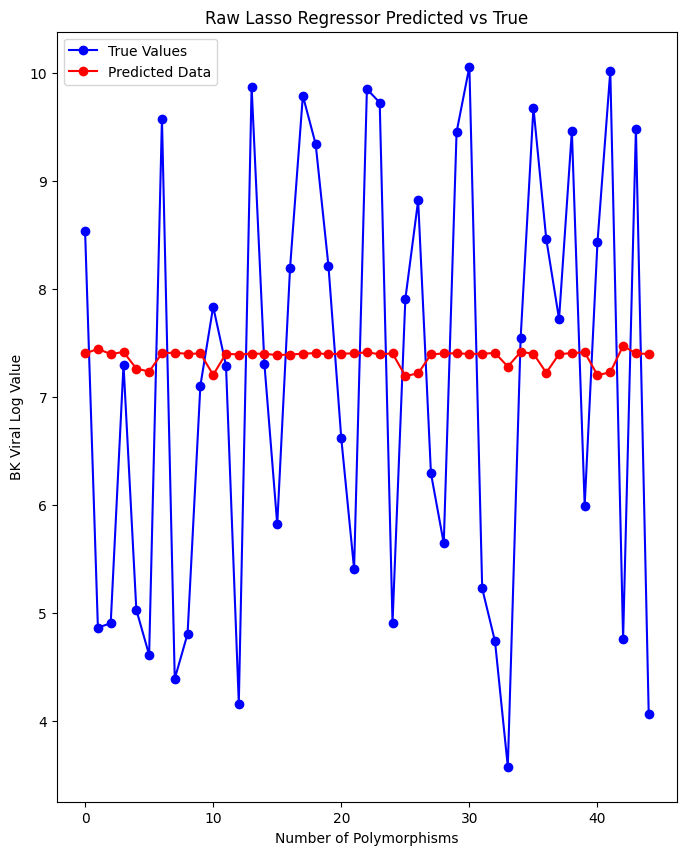

In [ ]:
plt.figure(figsize=(8, 10))

# Plot real data
plt.plot(range(len(y_test)), y_test, label='True Values', color='blue',marker = 'o')

# Plot predicted data
plt.plot(range(len(clf_pred)), clf_pred, label='Predicted Data', color='red',marker='o')

# Add labels and legend
plt.xlabel('Number of Polymorphisms')
plt.ylabel('BK Viral Log Value')
plt.title('Raw Lasso Regressor Predicted vs True')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr_svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr_svr.fit(X_train,y_train)
regr_svr_pred = regr_svr.predict(X_test)
print("Mean Absolute Error:     ",truncate(mean_absolute_error(y_test,regr_svr_pred),6))
print("Mean Squared Error:      ",truncate(mean_squared_error(y_test,regr_svr_pred),6))
print("Square Residual:         ",truncate(r2_score(y_test,regr_svr_pred),6))
print("Root Mean Squared Error: ",truncate(mean_squared_error(y_test,regr_svr_pred,squared = False),6))
#Lowest Mean Absolute Error of 1.034

Mean Absolute Error:      1.688435
Mean Squared Error:       3.848716
Square Residual:          0.065095
Root Mean Squared Error:  1.961814


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


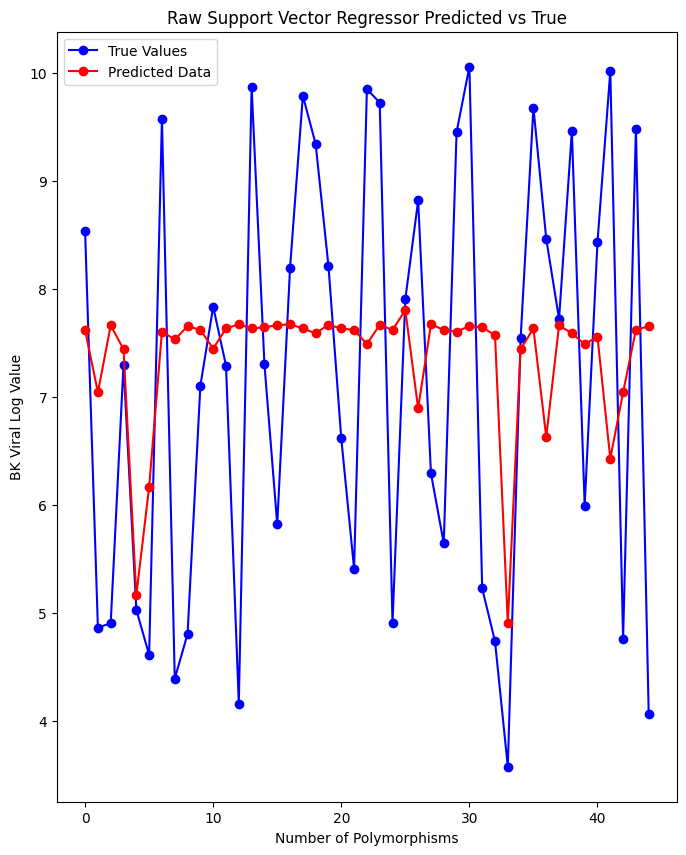

In [ ]:
plt.figure(figsize=(8, 10))

# Plot real data
plt.plot(range(len(y_test)), y_test, label='True Values', color='blue',marker = 'o')

# Plot predicted data
plt.plot(range(len(regr_svr_pred)), regr_svr_pred, label='Predicted Data', color='red',marker='o')

# Add labels and legend
plt.xlabel('Number of Polymorphisms')
plt.ylabel('BK Viral Log Value')
plt.title('Raw Support Vector Regressor Predicted vs True')
plt.legend()

# Show the plot
plt.show()

In [ ]:
print(np.log10(14))

1.146128035678238


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)
DTR_pred = regressor.predict(X_test)
print("Mean Absolute Error:    ",truncate(mean_absolute_error(y_test,DTR_pred),6))
print("Mean Squared Error:     ",truncate(mean_squared_error(y_test,DTR_pred),6))
print("Square Residual:        ",truncate(r2_score(y_test,DTR_pred),6))
print("Root Mean Squared Error:",truncate(mean_squared_error(y_test,DTR_pred, squared = False),6))

Mean Absolute Error:     1.850298
Mean Squared Error:      4.842658
Square Residual:         -0.176346
Root Mean Squared Error: 2.200604


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


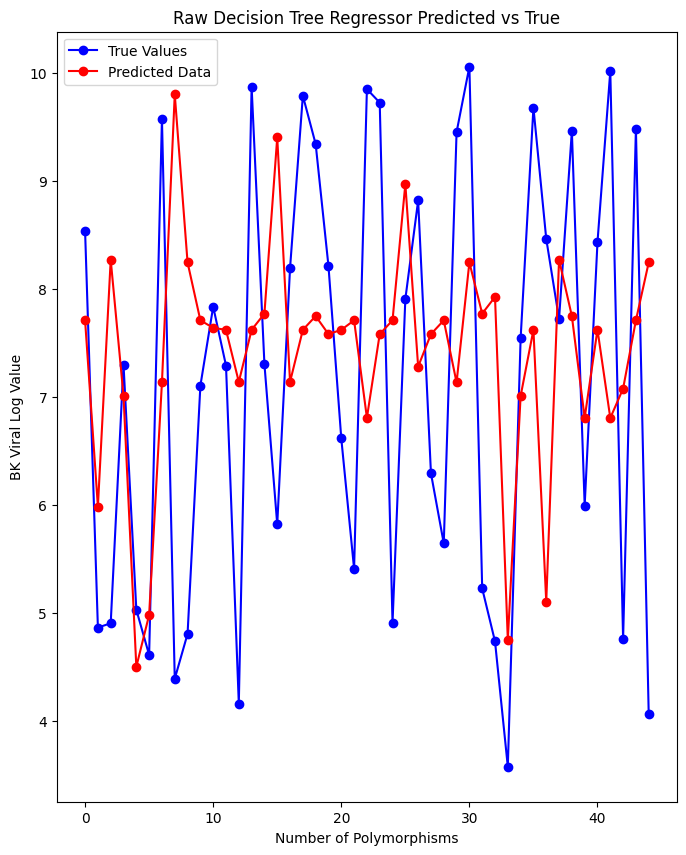

In [ ]:
plt.figure(figsize=(8, 10))

# Plot real data
plt.plot(range(len(y_test)), y_test, label='True Values', color='blue',marker='o')

# Plot predicted data
plt.plot(range(len(DTR_pred)), DTR_pred, label='Predicted Data', color='red',marker = 'o')

# Add labels and legend
plt.xlabel('Number of Polymorphisms')
plt.ylabel('BK Viral Log Value')
plt.title('Raw Decision Tree Regressor Predicted vs True')
plt.legend()

# Show the plot
plt.show()

In [ ]:
real_data = np.random.rand(100)
predicted_data = real_data + np.random.normal(0, 0.1, 100)

# Create the plot


In [ ]:
from sklearn.ensemble import RandomForestRegressor # Random Forest Regression
regr = RandomForestRegressor(max_depth = 2, random_state = 42)
regr.fit(X_train,y_train)
regr_prediction = regr.predict(X_test)
print("Mean Absolute Error:     ",truncate(mean_absolute_error(y_test,regr_prediction),6))
print("Mean Squared Error:      ",truncate(mean_squared_error(y_test,regr_prediction),6))
print("Square Residual:         ",truncate(r2_score(y_test,regr_prediction),6))
print("Root Mean Squared Error: ",truncate(mean_squared_error(y_test,regr_prediction, squared = False),6))

Mean Absolute Error:      1.809115
Mean Squared Error:       4.198278
Square Residual:          -0.019817
Root Mean Squared Error:  2.04897


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


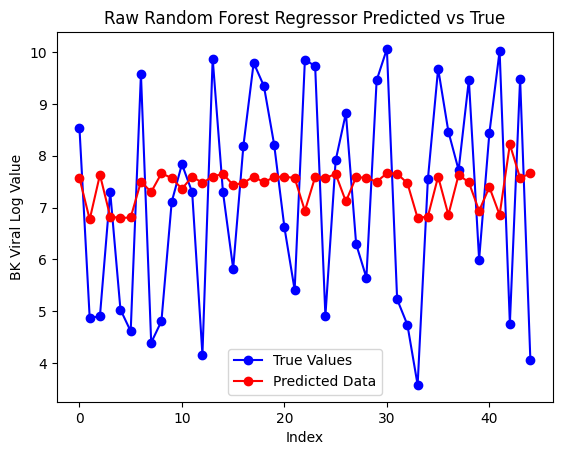

In [ ]:
# plt.figure(figsize=(8, 10))
# print(X_test.shape)
# print(y_test.shape)

# # Plot real data
plt.plot(range(len(y_test)), y_test, label='True Values', color='blue',marker='o')

# # Plot predicted data
plt.plot(range(len(regr_prediction)), regr_prediction, label='Predicted Data', color='red',marker='o')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('BK Viral Log Value')
plt.title('Raw Random Forest Regressor Predicted vs True')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
distributions = {'max_depth':[2,3,4,5,6],'n_estimators':[100,125,150,175,200]}
rfg = RandomizedSearchCV(regr,distributions,random_state = 42,scoring = 'neg_mean_absolute_error')
search = rfg.fit(X_train,y_train)
search.best_params_
searchpath = pd.DataFrame(search.cv_results_)
print(searchpath)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.528523      0.059347         0.030443        0.026420   
1       0.378609      0.076329         0.017456        0.006496   
2       0.308499      0.056154         0.015765        0.007831   
3       0.873544      0.292892         0.047253        0.025017   
4       0.767064      0.218625         0.041771        0.012722   
5       0.617233      0.083546         0.022395        0.005633   
6       0.546604      0.076219         0.024791        0.005873   
7       0.288760      0.097168         0.014278        0.010208   
8       0.176781      0.009457         0.008489        0.000434   
9       0.132596      0.042102         0.007539        0.001406   

   param_n_estimators  param_max_depth                                 params  \
0                 175                3  {'n_estimators': 175, 'max_depth': 3}   
1                 125                5  {'n_estimators': 125, 'max_depth': 5}   
2                 1

[2, 3, 4, 5, 6]
[100, 125, 150, 175, 200]


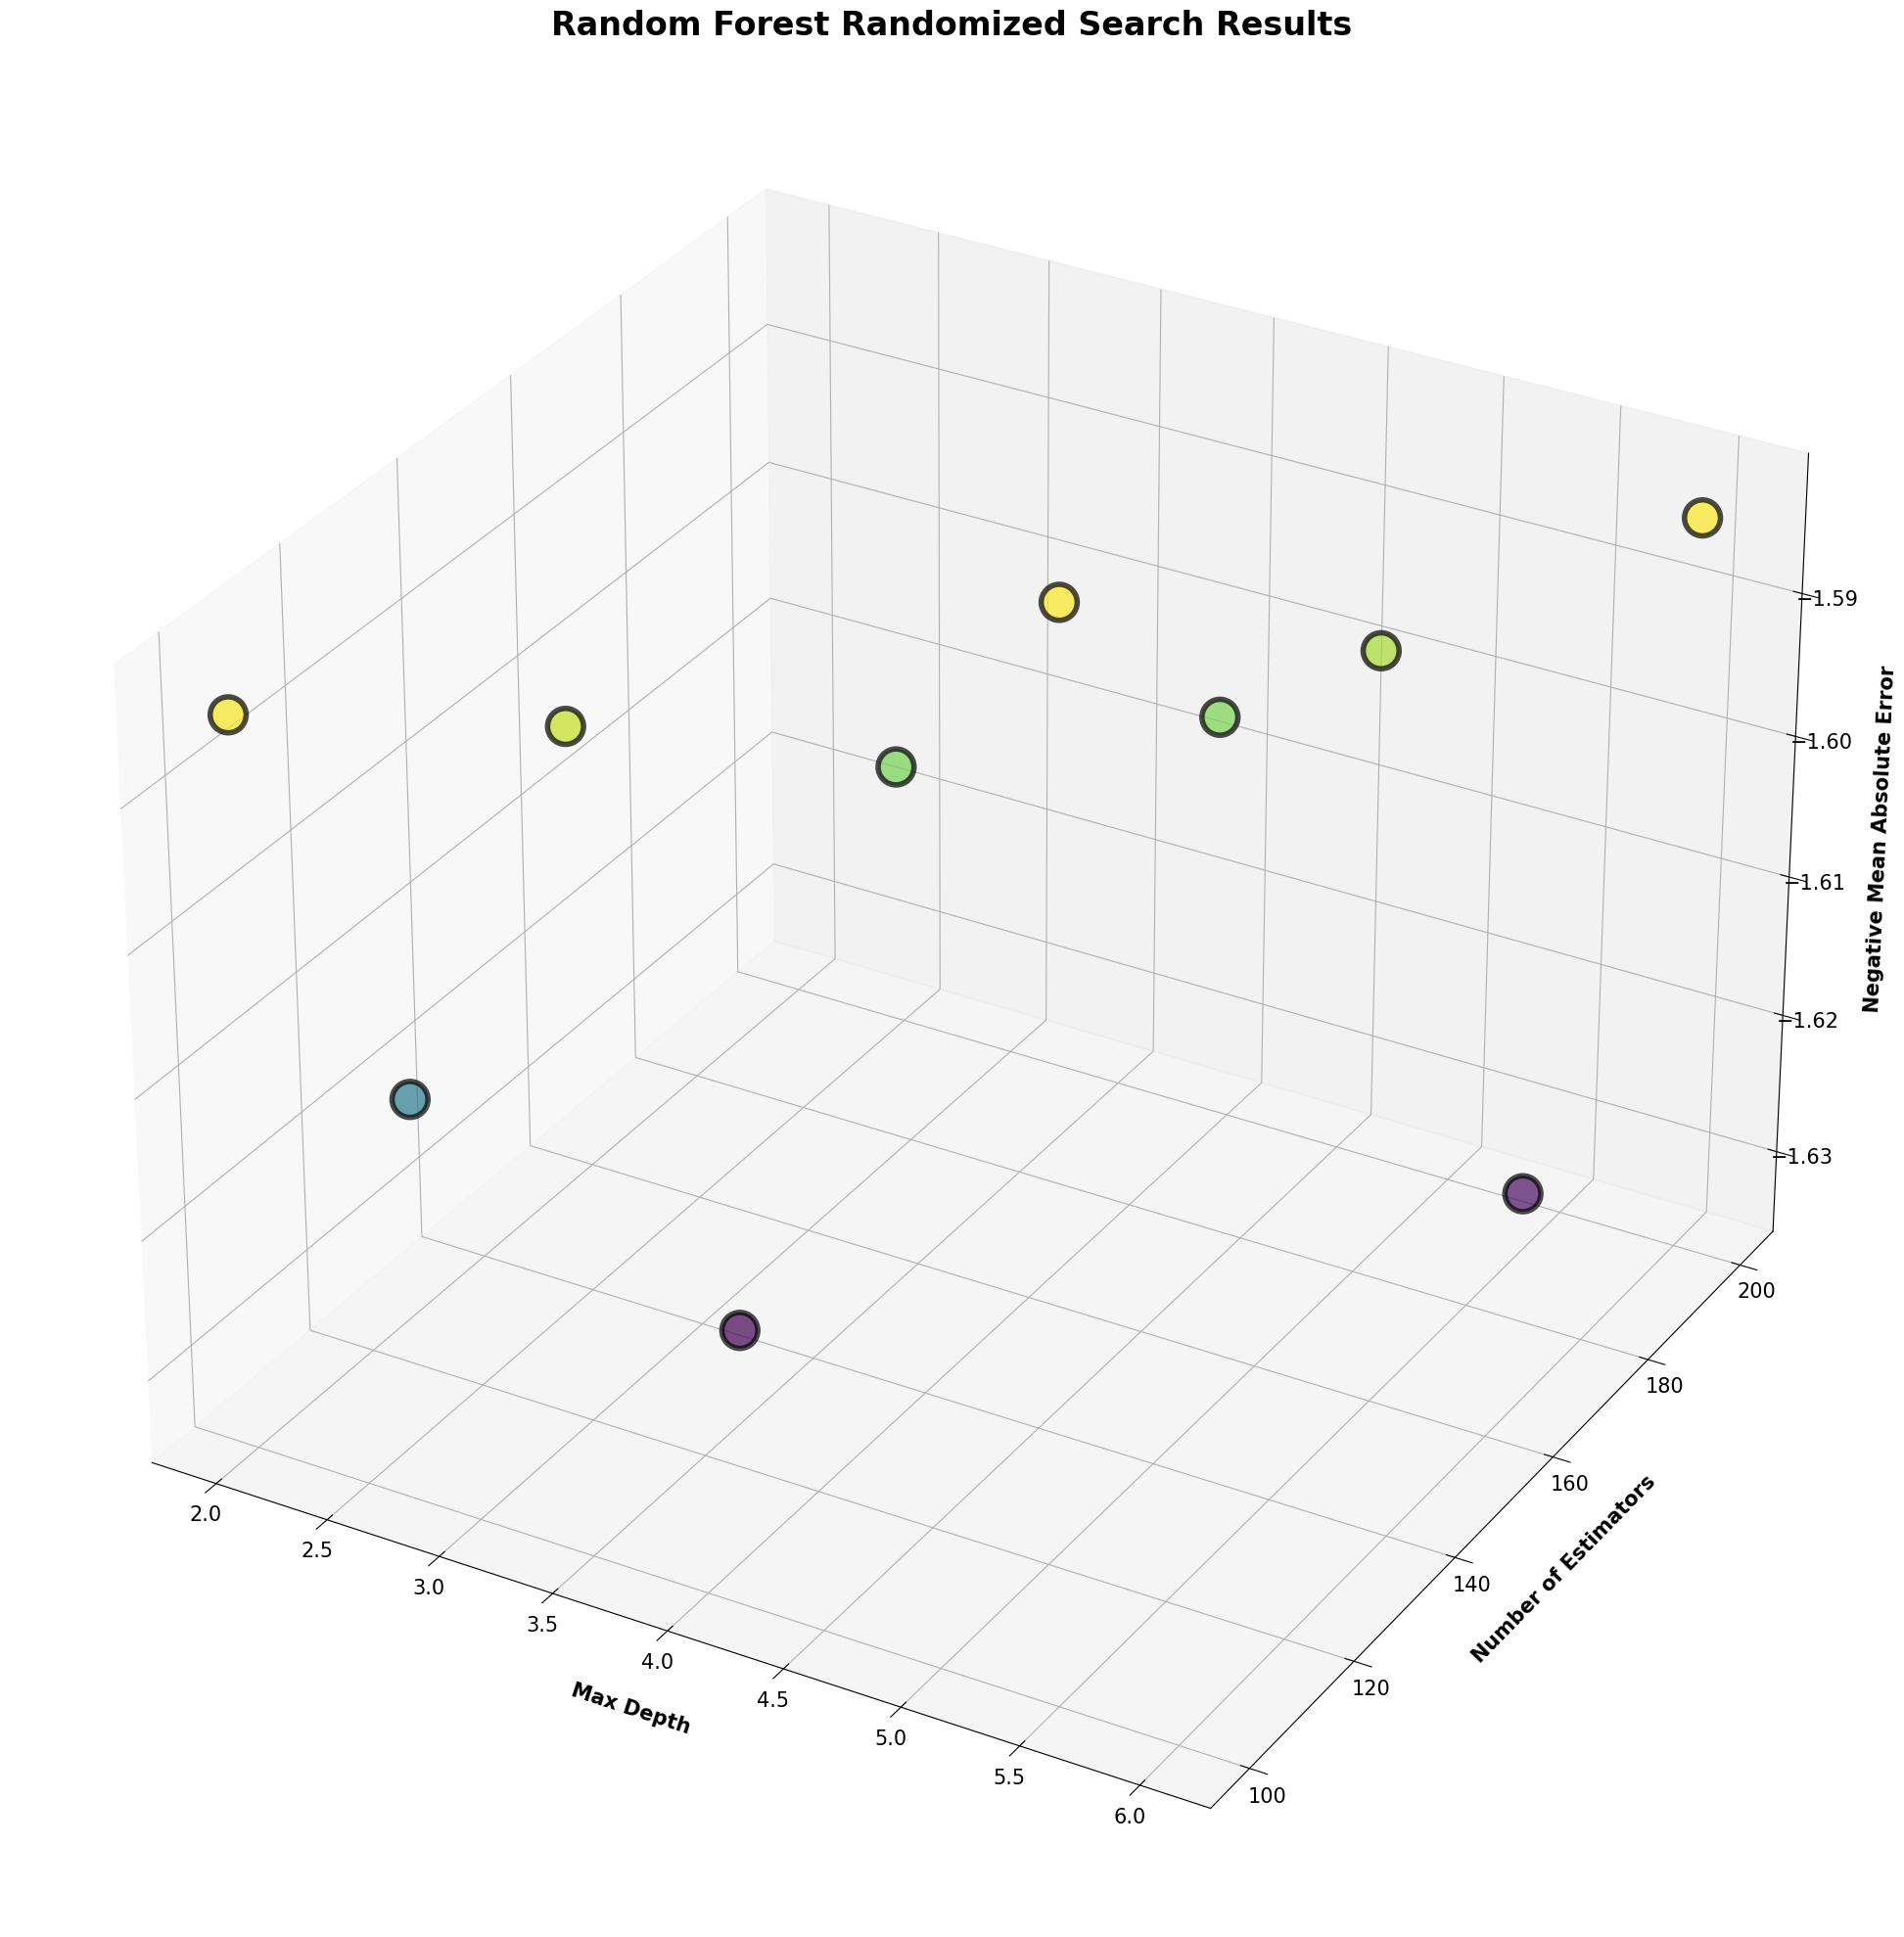

In [ ]:
import scipy.interpolate as interp
print(distributions['max_depth'])
print(distributions['n_estimators'])
a = np.array(distributions['max_depth'])
b = np.array(distributions['n_estimators'])
listk = np.reshape(searchpath['mean_test_score'],(10,1)).T
# z_inter = interp.interp1d(np.arange(list1.size), list1)
# z_ = z_inter(np.linspace(0,list1.size-1,x.size))
a_inter = interp.interp1d(np.arange(a.size),a)
a_ = a_inter(np.linspace(0,a.size-1,listk.size))
b_inter = interp.interp1d(np.arange(b.size),b)
b_ = b_inter(np.linspace(0,b.size-1,listk.size))

fig = plt.figure(figsize = (25, 25))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(a_,b_,listk,linewidths = 4, alpha = 0.7, edgecolor = 'black',s = 700, c = listk)
ax.set_xlabel('Max Depth', fontsize=15,labelpad=20,weight='bold')
ax.set_ylabel('Number of Estimators', fontsize=15,labelpad=20,weight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)

ax.set_zlabel('Negative Mean Absolute Error',fontsize=15,labelpad=20,weight='bold')
plt.title('Random Forest Randomized Search Results', fontsize=24,weight='bold')
plt.show()

Text(0.5, 1.0, 'Randomized Search')

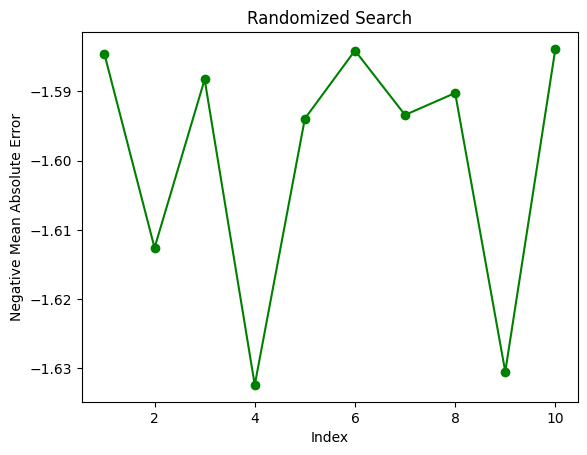

In [ ]:
plt.plot(range(1,11),searchpath['mean_test_score'],marker = 'o',color='green')
plt.xlabel('Index')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Randomized Search')

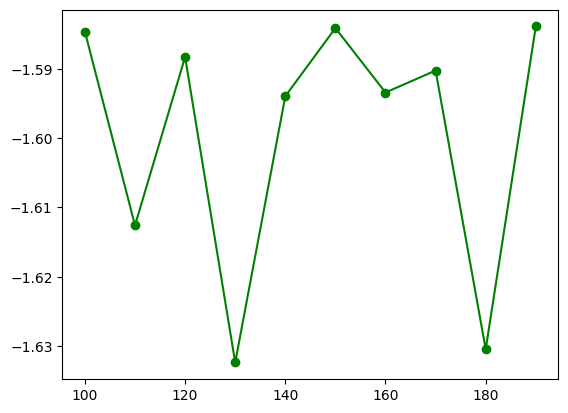

In [ ]:
plt.plot([100,110,120,130,140,150,160,170,180,190],searchpath['mean_test_score'],marker='o',color='green')

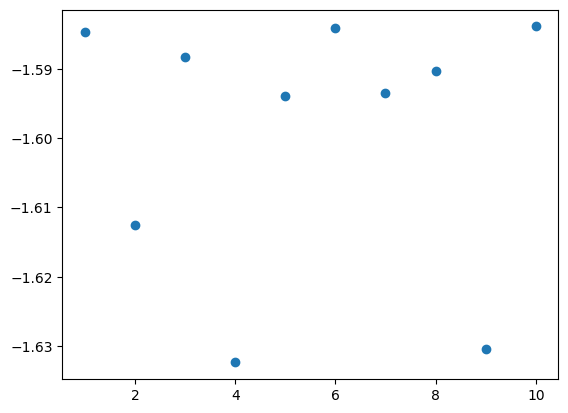

In [ ]:
plt.scatter(range(1,11),searchpath['mean_test_score'])

In [ ]:

search.best_score_

-1.5838631025313774

In [ ]:
from sklearn.model_selection import GridSearchCV
rfggsc = GridSearchCV(regr,distributions,scoring = 'neg_mean_absolute_error')
sgcs = rfggsc.fit(X_train,y_train)
# rfgpath = pd.DataFrame(rfggsc.cv_results)
# print(rfggsc.cv_results_)
path = pd.DataFrame(rfggsc.cv_results_)
print(path)
print(pd.concat([pd.DataFrame(rfggsc.cv_results_["params"]),pd.DataFrame(rfggsc.cv_results_["mean_test_score"], columns=["Negative Mean Absolute Error"])],axis=1))
# # plt.figure(figsize=(10,6))
# # plt.plot(range(1, 16), rfggsc.cv_results)



    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.204361      0.014014         0.009489        0.000539   
1        0.249135      0.006214         0.011342        0.000286   
2        0.203172      0.049223         0.009906        0.003496   
3        0.199655      0.010363         0.008849        0.000107   
4        0.226409      0.007481         0.010645        0.000959   
5        0.117693      0.006549         0.007102        0.001653   
6        0.144645      0.007435         0.007472        0.000911   
7        0.171642      0.008237         0.008383        0.000452   
8        0.197750      0.007000         0.009199        0.000165   
9        0.228752      0.008080         0.011013        0.002173   
10       0.115336      0.003584         0.007210        0.001348   
11       0.151922      0.008812         0.007418        0.000399   
12       0.178583      0.009721         0.008710        0.000680   
13       0.320367      0.055988         0.013923

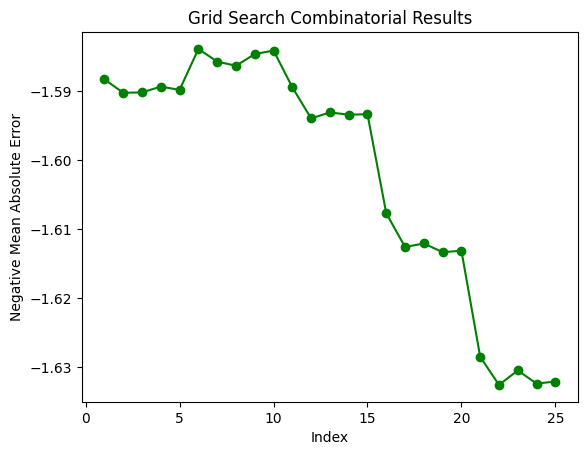

In [ ]:
plt.plot(range(1,26),path['mean_test_score'],marker='o',color='green')
plt.title("Grid Search Combinatorial Results")

# Add axis labels
plt.xlabel("Index")
plt.ylabel("Negative Mean Absolute Error")
plt.show()

In [ ]:
print(sgcs.best_score_)

-1.5838631025313774


In [ ]:
print(sgcs.best_params_)
print(sgcs.best_score_)

{'max_depth': 3, 'n_estimators': 100}
-1.5838631025313774


[2, 3, 4, 5, 6]
[100, 125, 150, 175, 200]


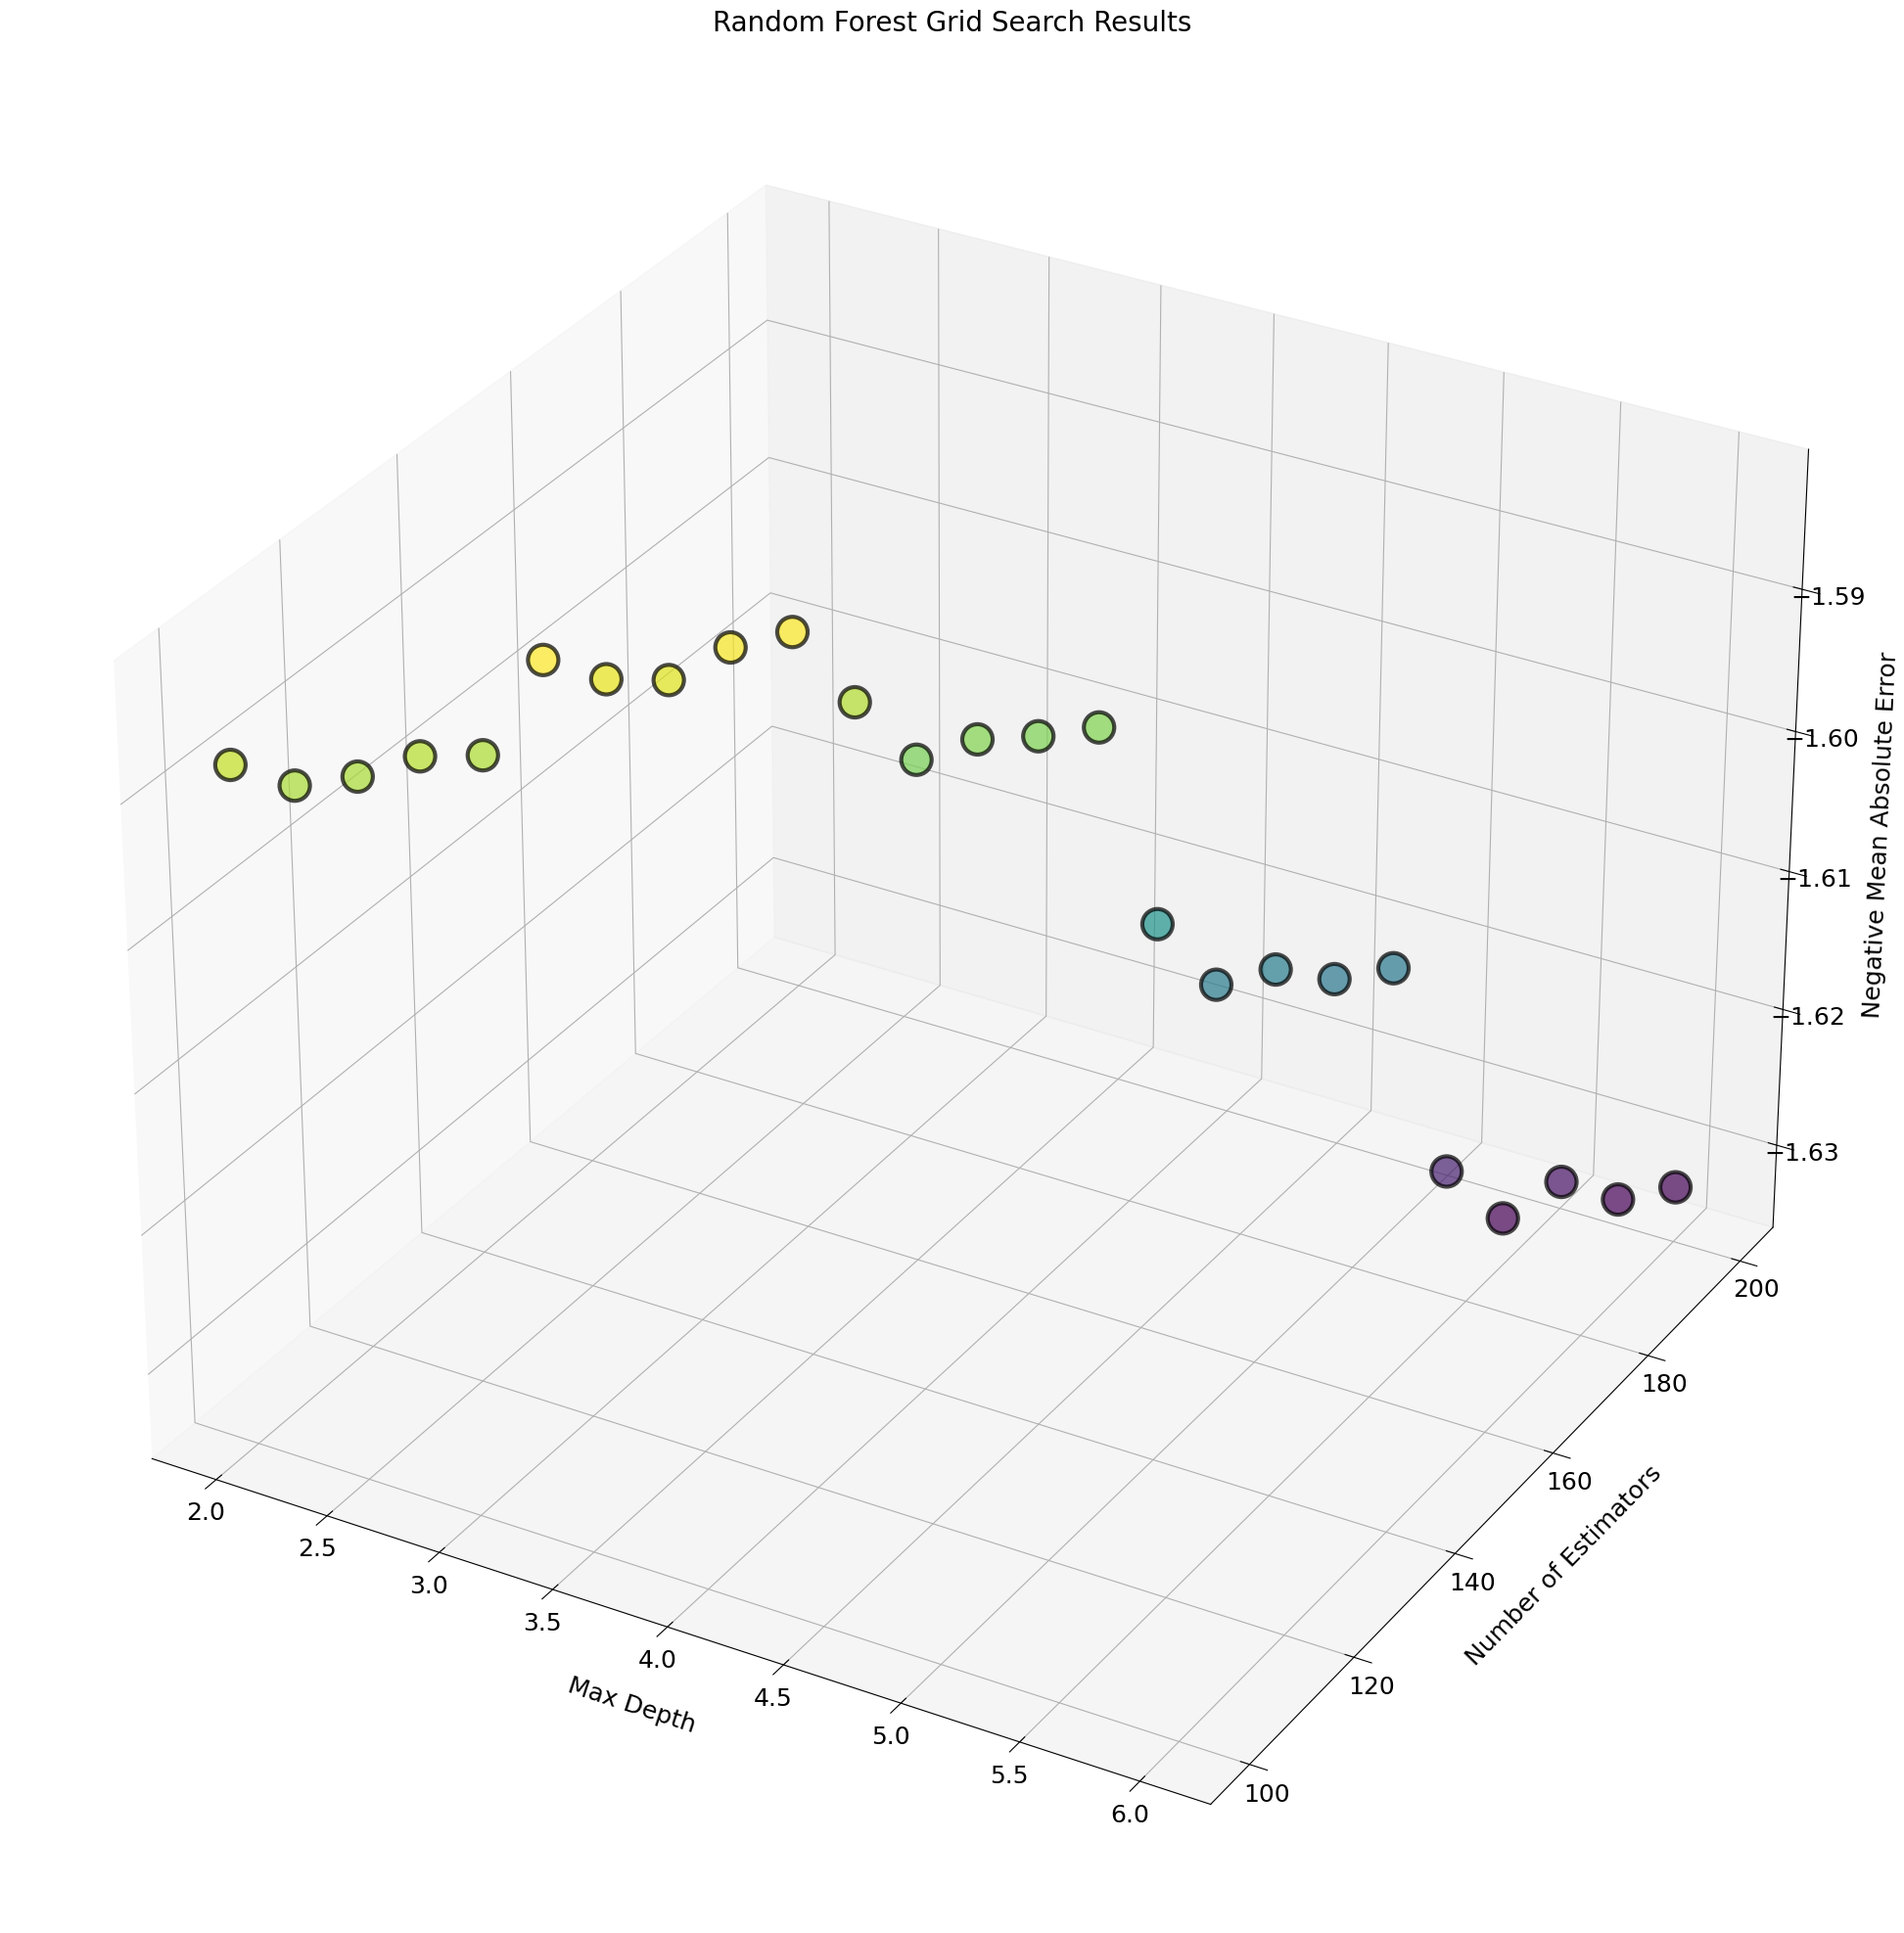

In [ ]:
# plt.plot(range(1,26),path['mean_test_score'])
import scipy.interpolate as interp
print(distributions['max_depth'])
print(distributions['n_estimators'])
x = np.array(distributions['max_depth'])
y = np.array(distributions['n_estimators'])
list1 = np.reshape(path['mean_test_score'],(25,1)).T
# z_inter = interp.interp1d(np.arange(list1.size), list1)
# z_ = z_inter(np.linspace(0,list1.size-1,x.size))
x_inter = interp.interp1d(np.arange(x.size),x)
x_ = x_inter(np.linspace(0,x.size-1,list1.size))
y_inter = interp.interp1d(np.arange(y.size),y)
y_ = y_inter(np.linspace(0,y.size-1,list1.size))

fig = plt.figure(figsize = (25, 25))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter3D(x_,y_,list1,linewidths = 3, alpha = 0.7, edgecolor = 'black',s = 500, c = list1)
ax.set_xlabel('Max Depth', fontsize=18,labelpad=20)
ax.set_ylabel('Number of Estimators', fontsize=18,labelpad=20)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='z', labelsize=18)

ax.set_zlabel('Negative Mean Absolute Error',fontsize=18,labelpad=20)
plt.title('Random Forest Grid Search Results', fontsize=20)
plt.show()

In [ ]:
# x = np.random.rand(20)
# y = np.random.rand(20)
# z = x*y

# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z,
#            linewidths=1, alpha=.7,
#            edgecolor='k',
#            s = 200,
#            c=z)
# plt.show()

In [ ]:
new_regr = RandomForestRegressor(max_depth=1,n_estimators=1000,random_state=42)
new_regr.fit(X_train,y_train)
new_regr_prediction = new_regr.predict(X_test)
print("Mean Absolute Error:    " ,truncate(mean_absolute_error(y_test,new_regr_prediction),6))
print("Mean Squared Error:     " ,truncate(mean_squared_error(y_test,new_regr_prediction),6))
print("Square Residual:        " ,truncate(r2_score(y_test,new_regr_prediction),6))
print("Root Mean Squared Error:",truncate(mean_squared_error(y_test,new_regr_prediction, squared = False),6))

Mean Absolute Error:     1.79784
Mean Squared Error:      4.169021
Square Residual:         -0.01271
Root Mean Squared Error: 2.041818


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import joblib
joblib.dump(new_regr, '/content/drive/MyDrive/model.joblib')

['/content/drive/MyDrive/model.joblib']

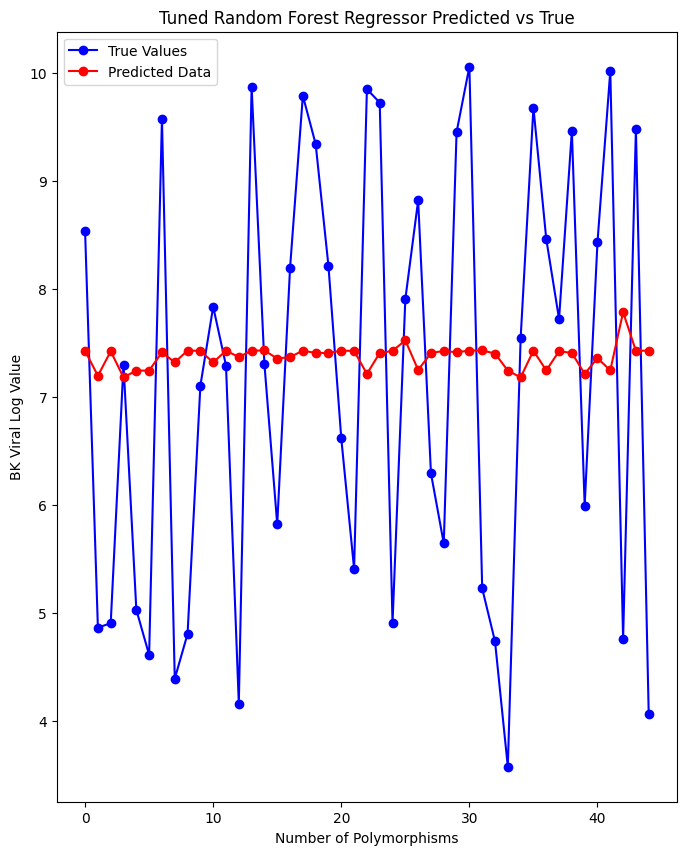

In [ ]:
plt.figure(figsize=(8, 10))

# Plot real data
plt.plot(range(len(y_test)), y_test, label='True Values', color='blue',marker='o')

# Plot predicted data
plt.plot(range(len(new_regr_prediction)), new_regr_prediction, label='Predicted Data', color='red',marker = 'o')

# Add labels and legend
plt.xlabel('Number of Polymorphisms')
plt.ylabel('BK Viral Log Value')
plt.title('Tuned Random Forest Regressor Predicted vs True')
plt.legend()

# Show the plot
plt.show()